In [1]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
        
        
    def compute(self):
        pass

In [2]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var+y_var

In [3]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var*y_var

In [4]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

In [5]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [6]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [7]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

In [8]:
g = Graph()

In [9]:
g.set_as_default()

In [10]:
A = Variable(10)

In [11]:
b =  Variable(1)

In [12]:
x = Placeholder()

In [13]:
y = multiply(A,x)

In [14]:

z = add(y,b)

In [15]:
 #Post order tree traversal

In [16]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
        
    recurse(operation)
    return nodes_postorder

In [17]:
class Session():
    
    def run(self,operation,feed_dict = {}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
             
            if type(node.output) == list:
                node.output =  np.array(node.output)
                
                
        return operation.output

In [18]:
sess = Session()

In [19]:
result = sess.run(operation = z,feed_dict = {x:10})

In [28]:
result

101

In [31]:
a = Variable([[10,20],[30,40]])
b = Variable([10,20,])
x = Placeholder()

In [32]:
sess = Session()

In [33]:
y = matmul(a,x); z = add(y,b)
import numpy as np

In [34]:
result = sess.run(z,{x:100})

In [35]:
result

array([[1010, 2020],
       [3010, 4020]])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [39]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

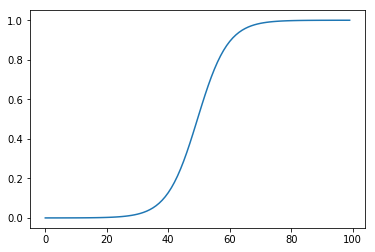

In [41]:
plt.plot(sample_a)

In [60]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self,z_val):
        return (1/(1+np.exp(-z_val)))

In [43]:
from sklearn.datasets import make_blobs

In [44]:
data = make_blobs(n_samples = 50,n_features = 2,centers= 2,random_state = 75)

In [45]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [46]:
type(data)

tuple

In [47]:
data[0]

array([[  7.3402781 ,   9.36149154],
       [  9.13332743,   8.74906102],
       [  1.99243535,  -8.85885722],
       [  7.38443759,   7.72520389],
       [  7.97613887,   8.80878209],
       [  7.76974352,   9.50899462],
       [  8.3186688 ,  10.1026025 ],
       [  8.79588546,   7.28046702],
       [  9.81270381,   9.46968531],
       [  1.57961049,  -8.17089971],
       [  0.06441546,  -9.04982817],
       [  7.2075117 ,   7.04533624],
       [  9.10704928,   9.0272212 ],
       [  1.82921897,  -9.86956281],
       [  7.85036314,   7.986659  ],
       [  3.04605603,  -7.50486114],
       [  1.85582689,  -6.74473432],
       [  2.88603902,  -8.85261704],
       [ -1.20046211,  -9.55928542],
       [  2.00890845,  -9.78471782],
       [  7.68945113,   9.01706723],
       [  6.42356167,   8.33356412],
       [  8.15467319,   7.87489634],
       [  1.92000795,  -7.50953708],
       [  1.90073973,  -7.24386675],
       [  7.7605855 ,   7.05124418],
       [  6.90561582,   9.23493842],
 

In [48]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [49]:
features = data[0]
labels = data[1]

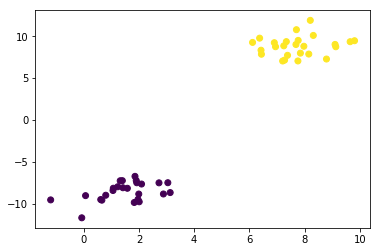

In [50]:
plt.scatter(features[:,0],features[:,1],c = labels)

In [52]:
g = Graph()

In [53]:
g.set_as_default()

In [54]:
x = Placeholder()

In [55]:
w = Variable([1,1])
b  = Variable(-5)

In [64]:
z = add(matmul(w,x),b)

In [65]:
a = Sigmoid(z)

In [66]:
ses = Session()

In [69]:
ses.run(operation=a,feed_dict = {x:[-8,-10]})

1.0261879630648827e-10